<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/pb_inteligencia_artificial_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160     

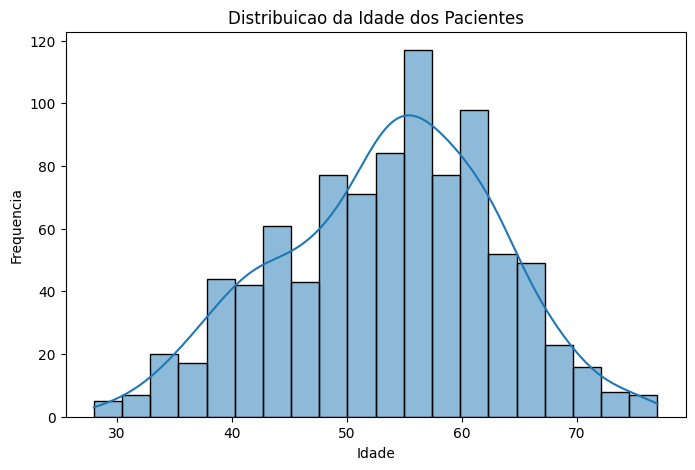

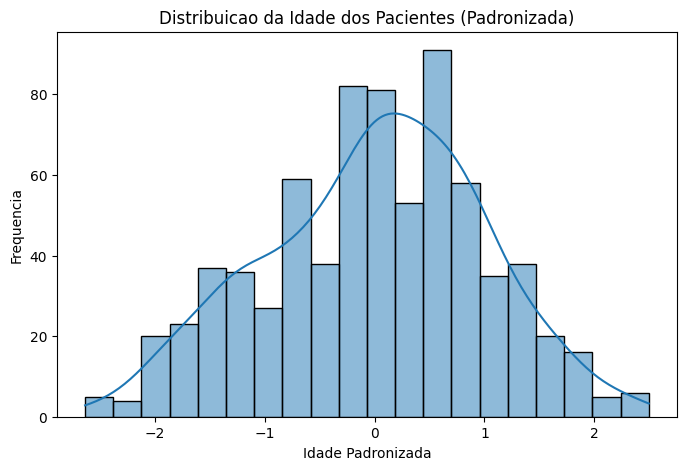

Etapa 4
Modelagem de K-Nearest Neighbors (KNN): Implemente e ajuste o algoritmo KNN, compreendendo suas nuances e aplicabilidade.


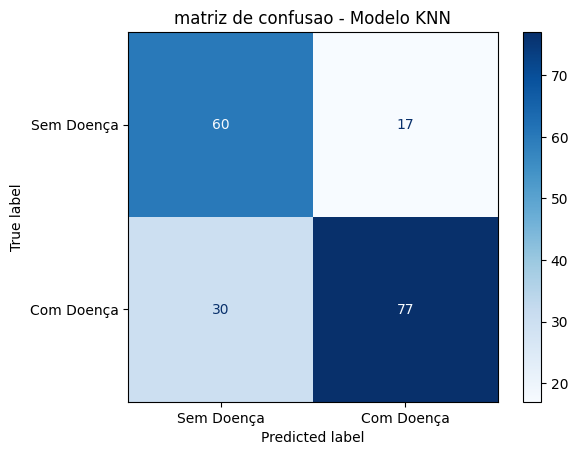

Etapa 5
Avaliação de Modelos: Avalie a qualidade do modelo desenvolvido usando acurácia.
acuracia do modelo KNN: 0.7446
Etapa 6
Análise de Parâmetros: Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).
acuracia para K=1: 0.6902
acuracia para K=2: 0.6957
acuracia para K=3: 0.6957
acuracia para K=4: 0.7065
acuracia para K=5: 0.7446
acuracia para K=6: 0.7065
acuracia para K=7: 0.7500
acuracia para K=8: 0.7120
acuracia para K=9: 0.7446
acuracia para K=10: 0.7337
acuracia para K=11: 0.7500
acuracia para K=12: 0.7500
acuracia para K=13: 0.7717
acuracia para K=14: 0.7391
acuracia para K=15: 0.7772
acuracia para K=16: 0.7554
acuracia para K=17: 0.7717
acuracia para K=18: 0.7663
acuracia para K=19: 0.7609
acuracia para K=20: 0.7663
melhor valor de K: 15 com acuracia: 0.7772


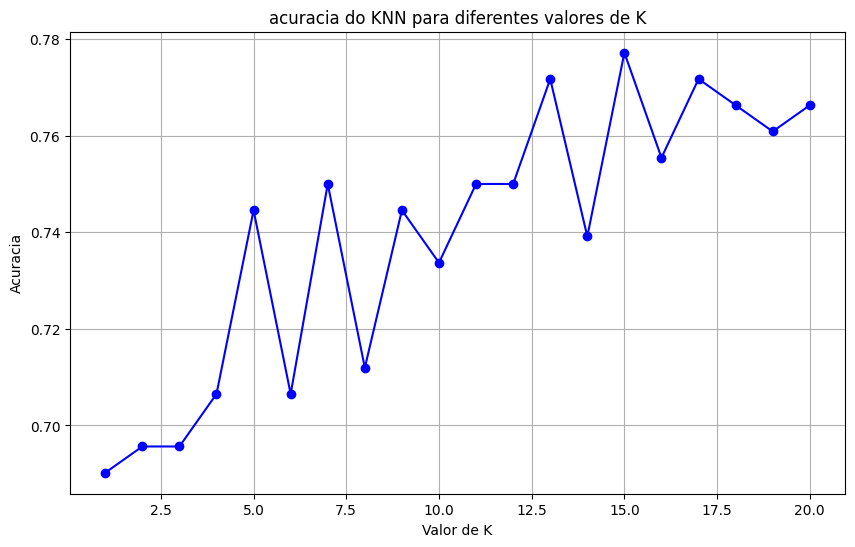

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


url = "https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/heart.csv"
df = pd.read_csv(url)
df.shape  # (n linhas, n colunas)
df.info()  # mostra o numero de entradas, tipos de dados e valores n nulos
df.describe()

print(df.head())

print(f"Etapa 1")
print("Carregamento de Dados: Identifique as características (features) e o alvo (target) nos conjuntos de dados, compreendendo sua estrutura e importância.")
#1- definir features e target
X = df.drop(columns=["HeartDisease"])  # Todas as colunas exceto a variavel alvo
y = df["HeartDisease"]  # variavel alvo
print(y.value_counts())

print(f"Etapa 2")
print("Divisão de Dados: Separe os dados em conjuntos de treino e validação, essenciais para o desenvolvimento e avaliação de modelos de ML. Você irá dividir 80% dos dados para treino e o restante para validação. ")
#2- dividir os dados em 80% treino e 20% validacao
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"treino: {X_train.shape}, validacao: {X_val.shape}")# mostrar tamanhos dos conjuntos


print(f"Etapa 3")
print("Transformação de Dados: Utilize transformadores do Scikit-Learn para ajustar e padronizar as variáveis dos dados.")
#3- inicializar o transformador de padronizacao
scaler = StandardScaler()

# aplicar a padronizacao apenas nas variaveis numericas
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_val_scaled = scaler.transform(X_val.select_dtypes(include=['int64', 'float64']))

print(f"treino padronizado: {X_train_scaled.shape}, validacao padronizada: {X_val_scaled.shape}")

#grafico
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.xlabel("Idade")
plt.ylabel("Frequencia")
plt.title("Distribuicao da Idade dos Pacientes")
plt.show()

#grafico dps
plt.figure(figsize=(8, 5))
sns.histplot(X_train_scaled[:, 0], bins=20, kde=True)  # Aqui estamos pegando a primeira coluna padronizada
plt.xlabel("Idade Padronizada")
plt.ylabel("Frequencia")
plt.title("Distribuicao da Idade dos Pacientes (Padronizada)")
plt.show()

# aplicar one-hot encoding nas colunas categoricas #encoder = OneHotEncoder(drop="first", sparse=False)#X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include=['object']))#X_val_encoded = encoder.transform(X_val.select_dtypes(include=['object']))


print(f"Etapa 4")
print("Modelagem de K-Nearest Neighbors (KNN): Implemente e ajuste o algoritmo KNN, compreendendo suas nuances e aplicabilidade.")

# inicializar o classificador KNN com um numero otimizado de vizinhos
knn = KNeighborsClassifier(n_neighbors=5)

# treinar o modelo com os dados padronizados
knn.fit(X_train_scaled, y_train)

# fazer previsoes no conjunto de validacao
y_pred = knn.predict(X_val_scaled)

# gerar matriz de confusao
cm = confusion_matrix(y_val, y_pred)

# exibir a matriz de confusao graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sem Doença", "Com Doença"])
disp.plot(cmap="Blues", values_format="d")
plt.title("matriz de confusao - Modelo KNN")
plt.show()



print(f"Etapa 5")
print("Avaliação de Modelos: Avalie a qualidade do modelo desenvolvido usando acurácia.")

# avaliar a precisao do modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"acuracia do modelo KNN: {accuracy:.4f}")



###
###

# analise de parametros
print(f"Etapa 6")
print("Análise de Parâmetros: Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).")

# definindo a lista de valores de K a serem testados
k_values = range(1, 21)
accuracies = []

# iterando sobre os valores de K
for k in k_values:
    # criando o modelo KNN com o valor atual de K
    knn = KNeighborsClassifier(n_neighbors=k)

    # treinando o modelo com os dados de treino padronizados
    knn.fit(X_train_scaled, y_train)

    # fazendo predicoes nos dados de validacao padronizados
    y_pred = knn.predict(X_val_scaled)

    # calculando a acuracia para o valor atual de K
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)

    # exibindo a acuracia para cada K
    print(f"acuracia para K={k}: {acc:.4f}")

#econtrando o melhor valor de K
best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)
print(f"melhor valor de K: {best_k} com acuracia: {best_acc:.4f}")

# mostrando os resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('acuracia do KNN para diferentes valores de K')
plt.xlabel('Valor de K')
plt.ylabel('Acuracia')
plt.grid(True)
plt.show()